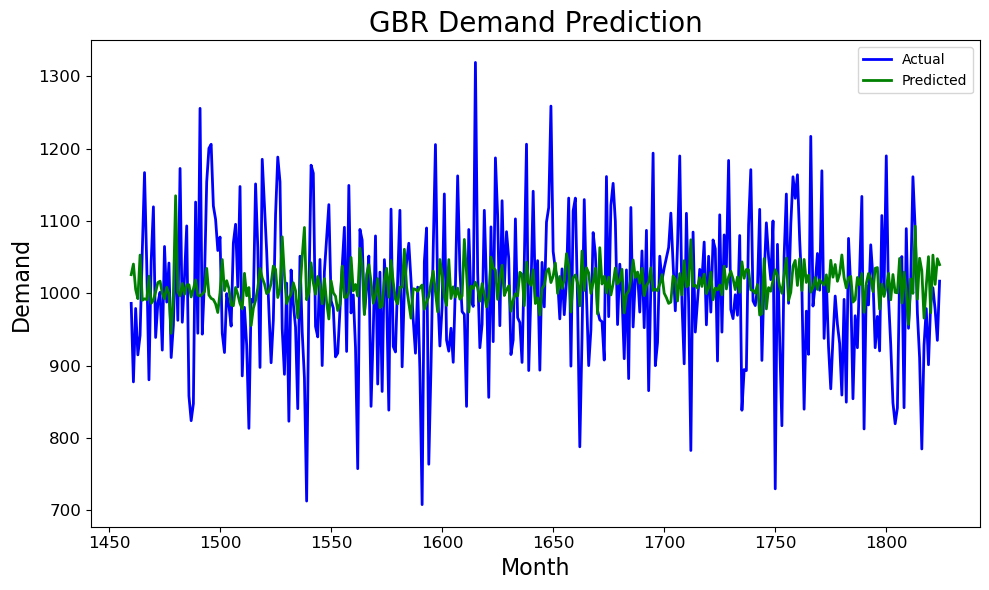

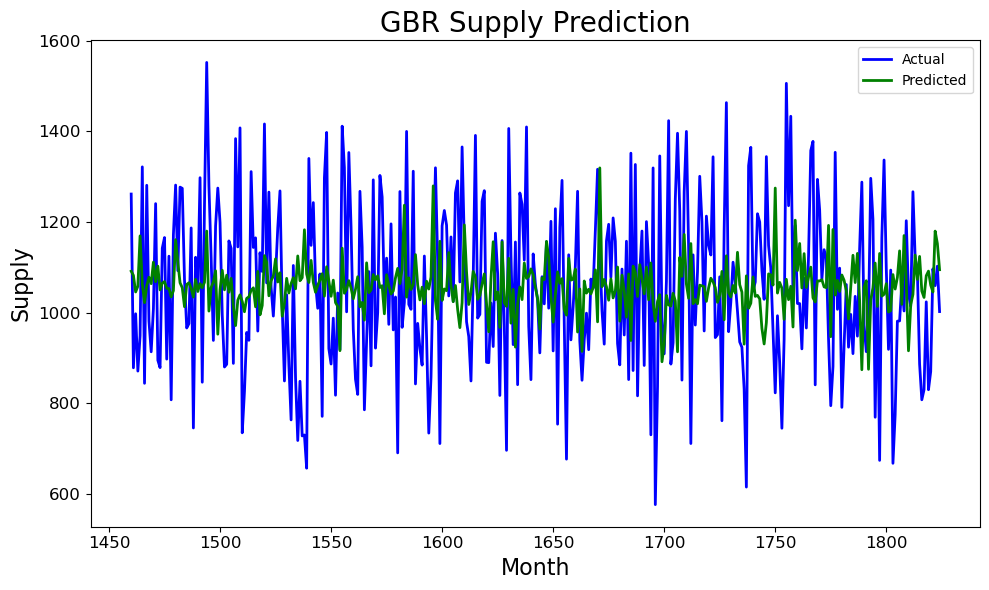

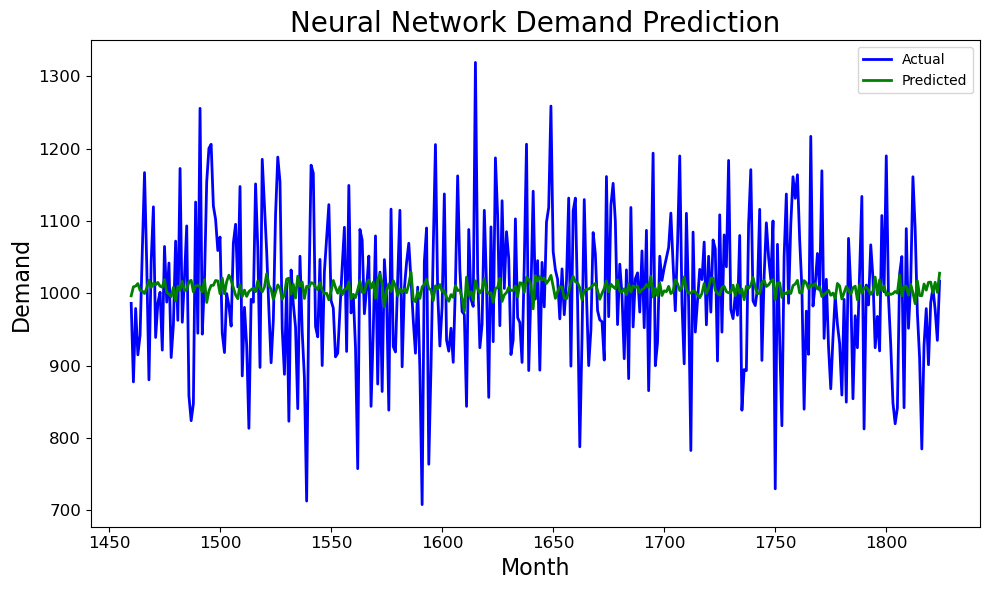

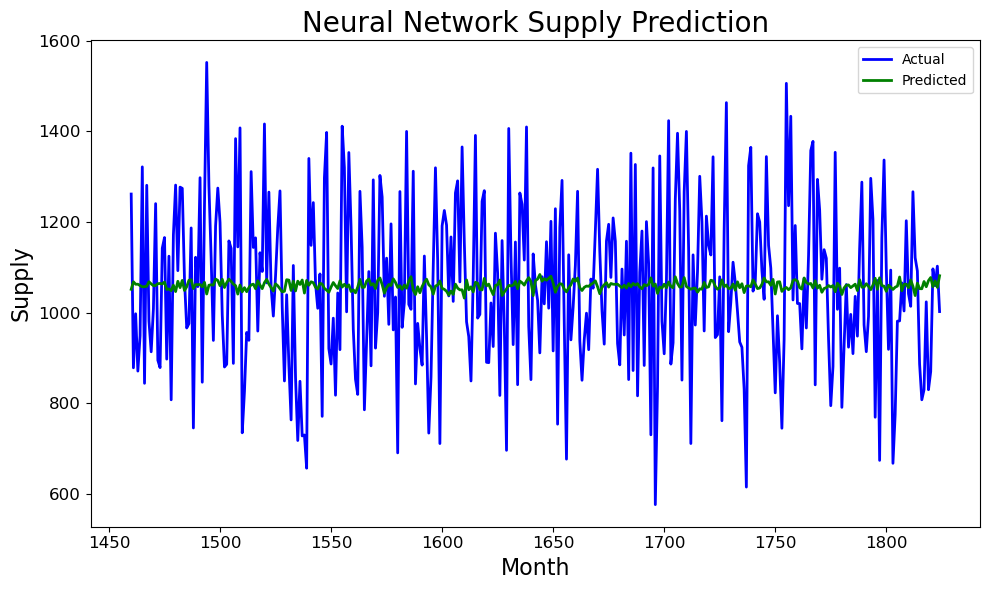

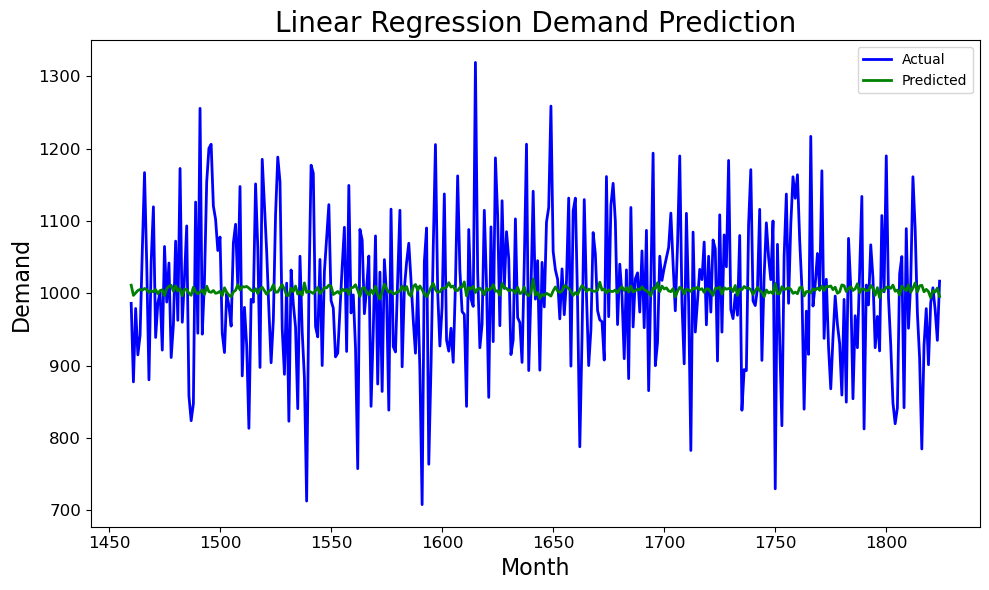

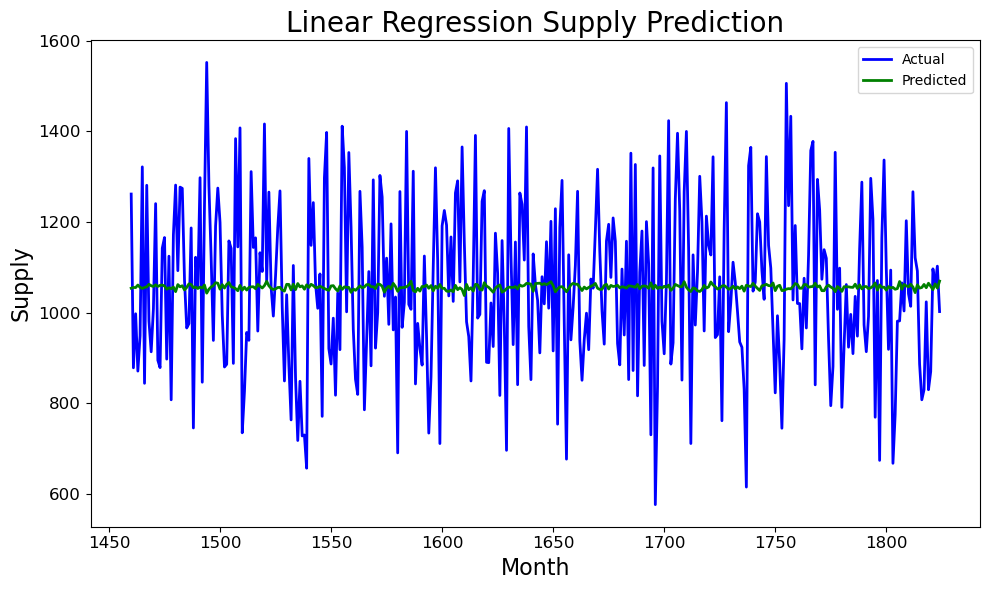

Model performance metrics, predictions, and plots saved successfully!


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Folder Structure Setup
base_folder = 'Z:/PhD Dissertation/My Journal Submissions/Work in Progress/MDPI - AI-Driven Digital Marketplace for Circular Economy/outputdata/Updated_Variables'
folders = ['GBR', 'Neural_Network', 'Linear_Regression', 'performance']
for folder in folders:
    os.makedirs(os.path.join(base_folder, folder), exist_ok=True)

# Load the dataset
data = pd.read_csv('Z:/PhD Dissertation/My Journal Submissions/Work in Progress/MDPI - AI-Driven Digital Marketplace for Circular Economy/inputdata/revised_realistic_synthetic_data_with_improvements.csv')

# Features and target
X = data[['Waste_Generation', 'Economic_Growth_Rate', 'Energy_Prices', 'Resource_Availability']]
y_demand = data['Demand']
y_supply = data['Supply']

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train_demand, y_test_demand = y_demand[:train_size], y_demand[train_size:]
y_train_supply, y_test_supply = y_supply[:train_size], y_supply[train_size:]

# Train GBR model
gbr_demand = GradientBoostingRegressor()
gbr_supply = GradientBoostingRegressor()

gbr_demand.fit(X_train, y_train_demand)
gbr_supply.fit(X_train, y_train_supply)

gbr_demand_pred = gbr_demand.predict(X_test)
gbr_supply_pred = gbr_supply.predict(X_test)

# Train Neural Network model
nn_demand = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)
nn_supply = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)

nn_demand.fit(X_train, y_train_demand)
nn_supply.fit(X_train, y_train_supply)

nn_demand_pred = nn_demand.predict(X_test)
nn_supply_pred = nn_supply.predict(X_test)

# Train Linear Regression model
lr_demand = LinearRegression()
lr_supply = LinearRegression()

lr_demand.fit(X_train, y_train_demand)
lr_supply.fit(X_train, y_train_supply)

lr_demand_pred = lr_demand.predict(X_test)
lr_supply_pred = lr_supply.predict(X_test)

# Performance Metrics Calculation
def calculate_performance_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# GBR Performance
gbr_demand_mae, gbr_demand_mse, gbr_demand_rmse, gbr_demand_r2 = calculate_performance_metrics(y_test_demand, gbr_demand_pred)
gbr_supply_mae, gbr_supply_mse, gbr_supply_rmse, gbr_supply_r2 = calculate_performance_metrics(y_test_supply, gbr_supply_pred)

# Neural Network Performance
nn_demand_mae, nn_demand_mse, nn_demand_rmse, nn_demand_r2 = calculate_performance_metrics(y_test_demand, nn_demand_pred)
nn_supply_mae, nn_supply_mse, nn_supply_rmse, nn_supply_r2 = calculate_performance_metrics(y_test_supply, nn_supply_pred)

# Linear Regression Performance
lr_demand_mae, lr_demand_mse, lr_demand_rmse, lr_demand_r2 = calculate_performance_metrics(y_test_demand, lr_demand_pred)
lr_supply_mae, lr_supply_mse, lr_supply_rmse, lr_supply_r2 = calculate_performance_metrics(y_test_supply, lr_supply_pred)

# Save Performance Metrics to CSV
performance_folder = os.path.join(base_folder, 'performance')
performance_data = {
    'Model': ['GBR Demand', 'GBR Supply', 'Neural Network Demand', 'Neural Network Supply', 'Linear Regression Demand', 'Linear Regression Supply'],
    'MAE': [gbr_demand_mae, gbr_supply_mae, nn_demand_mae, nn_supply_mae, lr_demand_mae, lr_supply_mae],
    'MSE': [gbr_demand_mse, gbr_supply_mse, nn_demand_mse, nn_supply_mse, lr_demand_mse, lr_supply_mse],
    'RMSE': [gbr_demand_rmse, gbr_supply_rmse, nn_demand_rmse, nn_supply_rmse, lr_demand_rmse, lr_supply_rmse],
    'R²': [gbr_demand_r2, gbr_supply_r2, nn_demand_r2, nn_supply_r2, lr_demand_r2, lr_supply_r2]
}
performance_df = pd.DataFrame(performance_data)
performance_df.to_csv(os.path.join(performance_folder, 'model_performance_metrics.csv'), index=False)

# Save Predictions to CSV
pd.DataFrame({'Month': data['Month'].iloc[y_test_demand.index], 'Actual_Demand': y_test_demand, 'Predicted_Demand': gbr_demand_pred}).to_csv(os.path.join(base_folder, 'GBR', 'predictions', 'GBR_Demand_Predictions.csv'), index=False)
pd.DataFrame({'Month': data['Month'].iloc[y_test_supply.index], 'Actual_Supply': y_test_supply, 'Predicted_Supply': gbr_supply_pred}).to_csv(os.path.join(base_folder, 'GBR', 'predictions', 'GBR_Supply_Predictions.csv'), index=False)

pd.DataFrame({'Month': data['Month'].iloc[y_test_demand.index], 'Actual_Demand': y_test_demand, 'Predicted_Demand': nn_demand_pred}).to_csv(os.path.join(base_folder, 'Neural_Network', 'predictions', 'NN_Demand_Predictions.csv'), index=False)
pd.DataFrame({'Month': data['Month'].iloc[y_test_supply.index], 'Actual_Supply': y_test_supply, 'Predicted_Supply': nn_supply_pred}).to_csv(os.path.join(base_folder, 'Neural_Network', 'predictions', 'NN_Supply_Predictions.csv'), index=False)

pd.DataFrame({'Month': data['Month'].iloc[y_test_demand.index], 'Actual_Demand': y_test_demand, 'Predicted_Demand': lr_demand_pred}).to_csv(os.path.join(base_folder, 'Linear_Regression', 'predictions', 'LR_Demand_Predictions.csv'), index=False)
pd.DataFrame({'Month': data['Month'].iloc[y_test_supply.index], 'Actual_Supply': y_test_supply, 'Predicted_Supply': lr_supply_pred}).to_csv(os.path.join(base_folder, 'Linear_Regression', 'predictions', 'LR_Supply_Predictions.csv'), index=False)

# Plot Results
def plot_results(y_true, y_pred, title, ylabel, filename):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true.index, y_true, label='Actual', color='blue', linewidth=2)
    plt.plot(y_true.index, y_pred, label='Predicted', color='green', linewidth=2)
    plt.title(title, fontsize=20)
    plt.xlabel('Month', fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(base_folder, filename))
    plt.show()

# Plot Actual vs Predicted for GBR
plot_results(y_test_demand, gbr_demand_pred, 'GBR Demand Prediction', 'Demand', 'GBR/plots/GBR_Demand_Prediction.pdf')
plot_results(y_test_supply, gbr_supply_pred, 'GBR Supply Prediction', 'Supply', 'GBR/plots/GBR_Supply_Prediction.pdf')

# Plot Actual vs Predicted for Neural Network
plot_results(y_test_demand, nn_demand_pred, 'Neural Network Demand Prediction', 'Demand', 'Neural_Network/plots/NN_Demand_Prediction.pdf')
plot_results(y_test_supply, nn_supply_pred, 'Neural Network Supply Prediction', 'Supply', 'Neural_Network/plots/NN_Supply_Prediction.pdf')

# Plot Actual vs Predicted for Linear Regression
plot_results(y_test_demand, lr_demand_pred, 'Linear Regression Demand Prediction', 'Demand', 'Linear_Regression/plots/LR_Demand_Prediction.pdf')
plot_results(y_test_supply, lr_supply_pred, 'Linear Regression Supply Prediction', 'Supply', 'Linear_Regression/plots/LR_Supply_Prediction.pdf')

print("Model performance metrics, predictions, and plots saved successfully!")


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.dates as mdates

# Folder Structure Setup
base_folder = 'Z:/PhD Dissertation/My Journal Submissions/Work in Progress/MDPI - AI-Driven Digital Marketplace for Circular Economy/outputdata/Updated_Variables'
gbr_folder = os.path.join(base_folder, 'GBR')
nn_folder = os.path.join(base_folder, 'Neural_Network')
lr_folder = os.path.join(base_folder, 'Linear_Regression')
performance_folder = os.path.join(base_folder, 'performance')

# Load the dataset
data = pd.read_csv('Z:/PhD Dissertation/My Journal Submissions/Work in Progress/MDPI - AI-Driven Digital Marketplace for Circular Economy/inputdata/revised_realistic_synthetic_data_with_improvements.csv')

# Convert Month column to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Ensure the data frequency is monthly
data = data.asfreq('MS')

# Features and target
X = data[['Waste_Generation', 'Economic_Growth_Rate', 'Energy_Prices', 'Resource_Availability']]
y_demand = data['Demand']
y_supply = data['Supply']

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train_demand, y_test_demand = y_demand[:train_size], y_demand[train_size:]
y_train_supply, y_test_supply = y_supply[:train_size], y_supply[train_size:]

# Train GBR model
gbr_demand = GradientBoostingRegressor()
gbr_supply = GradientBoostingRegressor()

gbr_demand.fit(X_train, y_train_demand)
gbr_supply.fit(X_train, y_train_supply)

gbr_demand_pred_full = gbr_demand.predict(X)
gbr_supply_pred_full = gbr_supply.predict(X)

# Train Neural Network model
nn_demand = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)
nn_supply = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)

nn_demand.fit(X_train, y_train_demand)
nn_supply.fit(X_train, y_train_supply)

nn_demand_pred_full = nn_demand.predict(X)
nn_supply_pred_full = nn_supply.predict(X)

# Train Linear Regression model
lr_demand = LinearRegression()
lr_supply = LinearRegression()

lr_demand.fit(X_train, y_train_demand)
lr_supply.fit(X_train, y_train_supply)

lr_demand_pred_full = lr_demand.predict(X)
lr_supply_pred_full = lr_supply.predict(X)

# Performance Metrics Calculation
def calculate_performance_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# GBR Performance
gbr_demand_mae, gbr_demand_mse, gbr_demand_rmse, gbr_demand_r2 = calculate_performance_metrics(y_demand, gbr_demand_pred_full)
gbr_supply_mae, gbr_supply_mse, gbr_supply_rmse, gbr_supply_r2 = calculate_performance_metrics(y_supply, gbr_supply_pred_full)

# Neural Network Performance
nn_demand_mae, nn_demand_mse, nn_demand_rmse, nn_demand_r2 = calculate_performance_metrics(y_demand, nn_demand_pred_full)
nn_supply_mae, nn_supply_mse, nn_supply_rmse, nn_supply_r2 = calculate_performance_metrics(y_supply, nn_supply_pred_full)

# Linear Regression Performance
lr_demand_mae, lr_demand_mse, lr_demand_rmse, lr_demand_r2 = calculate_performance_metrics(y_demand, lr_demand_pred_full)
lr_supply_mae, lr_supply_mse, lr_supply_rmse, lr_supply_r2 = calculate_performance_metrics(y_supply, lr_supply_pred_full)

# Save Performance Metrics to CSV
performance_data = {
    'Model': ['GBR Demand', 'GBR Supply', 'Neural Network Demand', 'Neural Network Supply', 'Linear Regression Demand', 'Linear Regression Supply'],
    'MAE': [gbr_demand_mae, gbr_supply_mae, nn_demand_mae, nn_supply_mae, lr_demand_mae, lr_supply_mae],
    'MSE': [gbr_demand_mse, gbr_supply_mse, nn_demand_mse, nn_supply_mse, lr_demand_mse, lr_supply_mse],
    'RMSE': [gbr_demand_rmse, gbr_supply_rmse, nn_demand_rmse, nn_supply_rmse, lr_demand_rmse, lr_supply_rmse],
    'R²': [gbr_demand_r2, gbr_supply_r2, nn_demand_r2, nn_supply_r2, lr_demand_r2, lr_supply_r2]
}
performance_df = pd.DataFrame(performance_data)
performance_df.to_csv(os.path.join(performance_folder, 'model_performance_metrics.csv'), index=False)

# Save Predictions to CSV
pd.DataFrame({'Month': data.index, 'Actual_Demand': y_demand, 'Predicted_Demand': gbr_demand_pred_full}).to_csv(os.path.join(gbr_folder, 'GBR_Demand_Predictions.csv'), index=False)
pd.DataFrame({'Month': data.index, 'Actual_Supply': y_supply, 'Predicted_Supply': gbr_supply_pred_full}).to_csv(os.path.join(gbr_folder, 'GBR_Supply_Predictions.csv'), index=False)

# Plot Results
date_range = pd.date_range(start='2024-01-01', end='2029-12-01', freq='YS')

def plot_results(y_true, y_pred, title, ylabel, filename):
    plt.figure(figsize=(11, 8))
    plt.plot(y_true.index, y_true, label='Actual', color='blue', linewidth=2)
    plt.plot(y_true.index, y_pred, label='Predicted', color='green', linestyle='--', linewidth=2)
    plt.title(title, fontsize=25)
    plt.xlabel('Date', fontsize=32)
    plt.ylabel(ylabel, fontsize=32)
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks at year intervals
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format x-axis as years
    plt.xticks(date_range, date_range.year, fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.savefig(os.path.join(base_folder, filename))
    plt.close()

# Plot Actual vs Predicted for GBR
plot_results(y_demand, gbr_demand_pred_full, 'GBR Demand Prediction with Added Variables', 'Demand', 'GBR/GBR_Demand_Prediction.pdf')
plot_results(y_supply, gbr_supply_pred_full, 'GBR Supply Prediction with Added Variables', 'Supply', 'GBR/GBR_Supply_Prediction.pdf')

# Plot Actual vs Predicted for Neural Network
plot_results(y_demand, nn_demand_pred_full, 'Neural Network Demand Prediction with Added Variables', 'Demand', 'Neural_Network/NN_Demand_Prediction.pdf')
plot_results(y_supply, nn_supply_pred_full, 'Neural Network Supply Prediction with Added Variables', 'Supply', 'Neural_Network/NN_Supply_Prediction.pdf')

# Plot Actual vs Predicted for Linear Regression
plot_results(y_demand, lr_demand_pred_full, 'Linear Regression Demand Prediction with Added Variables', 'Demand', 'Linear_Regression/LR_Demand_Prediction.pdf')
plot_results(y_supply, lr_supply_pred_full, 'Linear Regression Supply Prediction with Added Variables', 'Supply', 'Linear_Regression/LR_Supply_Prediction.pdf')

print("Model performance metrics, predictions, and plots saved successfully!")


Model performance metrics, predictions, and plots saved successfully!
